# Rf 5 0 9_Wsinteractive

Organization and simultaneous fits: easy interactive access to workspace contents - CINT to CLING code migration




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:56 AM.</small></i>

In [1]:
import ROOT


def fillWorkspace(w):
    # Create pdf and fill workspace
    # --------------------------------------------------------

    # Declare observable x
    x = ROOT.RooRealVar("x", "x", 0, 10)

    # Create two Gaussian PDFs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and
    # their parameters
    mean = ROOT.RooRealVar("mean", "mean of gaussians", 5, 0, 10)
    sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.5)
    sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 1)

    sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
    sig2 = ROOT.RooGaussian("sig2", "Signal component 2", x, mean, sigma2)

    # Build Chebychev polynomial p.d.f.
    a0 = ROOT.RooRealVar("a0", "a0", 0.5, 0., 1.)
    a1 = ROOT.RooRealVar("a1", "a1", -0.2, 0., 1.)
    bkg = ROOT.RooChebychev("bkg", "Background", x, ROOT.RooArgList(a0, a1))

    # Sum the signal components into a composite signal p.d.f.
    sig1frac = ROOT.RooRealVar(
        "sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.)
    sig = ROOT.RooAddPdf(
        "sig", "Signal", ROOT.RooArgList(
            sig1, sig2), ROOT.RooArgList(sig1frac))

    # Sum the composite signal and background
    bkgfrac = ROOT.RooRealVar("bkgfrac", "fraction of background", 0.5, 0., 1.)
    model = ROOT.RooAddPdf(
        "model",
        "g1+g2+a",
        ROOT.RooArgList(
            bkg,
            sig),
        ROOT.RooArgList(bkgfrac))

    getattr(w, 'import')(model)

Welcome to JupyROOT 6.18/03


Create and fill workspace
------------------------------------------------

Create a workspace named 'w'
With CINT w could exports its contents to
a same-name C++ namespace in CINT 'namespace w'.
but self does not work anymore in CLING.
so self tutorial is an example on how to
change the code

In [2]:
w = ROOT.RooWorkspace("w", ROOT.kTRUE)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:ObjectHandling -- RooWorkspace::exportToCint(w) INFO: references to all objects in this workspace will be created in CINT in 'namespace w'


Fill workspace with p.d.f. and data in a separate function

In [3]:
fillWorkspace(w)

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooAddPdf::model
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooChebychev::bkg
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::x
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::a0
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::a1
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::bkgfrac
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooAddPdf::sig
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooGaussian::sig1
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::mean
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sigma1
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sig1frac
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooGaussian::sig2
[#1] INFO:ObjectHandling -- RooWorkspace::import(

Print workspace contents

In [4]:
w.Print()


RooWorkspace(w) w contents

variables
---------
(a0,a1,bkgfrac,mean,sig1frac,sigma1,sigma2,x)

p.d.f.s
-------
RooChebychev::bkg[ x=x coefList=(a0,a1) ] = 1
RooAddPdf::model[ bkgfrac * bkg + [%] * sig ] = 1
RooAddPdf::sig[ sig1frac * sig1 + [%] * sig2 ] = 1
RooGaussian::sig1[ x=x mean=mean sigma=sigma1 ] = 1
RooGaussian::sig2[ x=x mean=mean sigma=sigma2 ] = 1



self does not work anymore with CLING
use normal workspace functionality

Use workspace contents
----------------------------------------------

Old syntax to use the name space prefix operator to access the workspace contents

 = w.model.generate(w.x,1000)
 = w.model.fitTo(*d)

use normal workspace methods

In [5]:
model = w.pdf("model")
x = w.var("x")

d = model.generate(ROOT.RooArgSet(x), 1000)
r = model.fitTo(d)

[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_model_FOR_OBS_x with 0 entries
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg,sig1,sig2)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 a1           0.00000e+00  1.00000e-01    0.00000e+00  1.00000e+00
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 BROUGHT BACK INSIDE LIMITS.
     3 bkgfrac      5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     4 mean         5.00000e+00  1.00000e+00    0.0

old syntax to access the variable x
frame = w.x.frame()

In [6]:
frame = x.frame()
d.plotOn(frame)

<ROOT.RooPlot object ("frame_x_55c21bed6140") at 0x55c21bed6140>

OLD syntax to ommit x.
NB: The 'w.' prefix can be omitted if namespace w is imported in local namespace
in the usual C++ way

using namespace w
model.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components(bkg), ROOT.RooFit.LineStyle(ROOT.kDashed))

correct syntax

In [7]:
bkg = w.pdf("bkg")
model.plotOn(frame)
ras_bkg = ROOT.RooArgSet(bkg)
model.plotOn(frame, ROOT.RooFit.Components(ras_bkg),
             ROOT.RooFit.LineStyle(ROOT.kDashed))

<ROOT.RooPlot object ("frame_x_55c21bed6140") at 0x55c21bed6140>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Draw the frame on the canvas

In [8]:
c = ROOT.TCanvas("rf509_wsinteractive", "rf509_wsinteractive", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()

c.SaveAs("rf509_wsinteractive.png")

Info in <TCanvas::Print>: png file rf509_wsinteractive.png has been created


Draw all canvases 

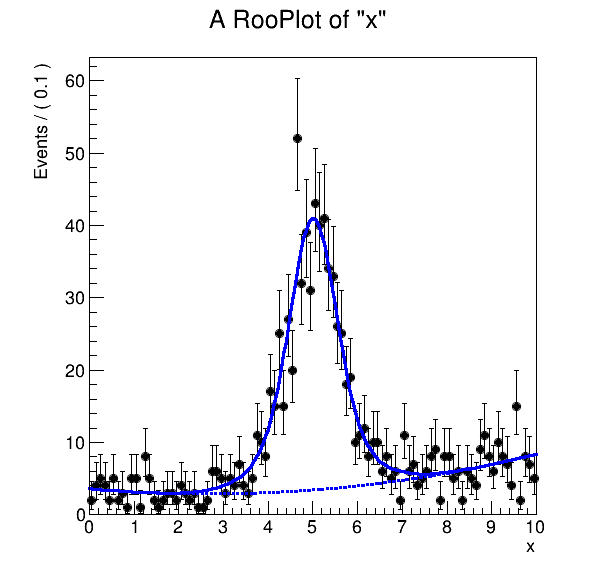

In [9]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()